In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-vaccination-and-case-trends/rows.csv
/kaggle/input/covid-vaccination-data/covid.csv


In [2]:
import pandas as pd 

file_path = '/kaggle/input/covid-vaccination-data/covid.csv'
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5331 entries, 0 to 5330
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date Administered                 5331 non-null   object 
 1   AgeGroupVacc                      5331 non-null   object 
 2   7-day_avg_group_cases_per_100k    5331 non-null   float64
 3   Administered_Dose1_pct_agegroup   5331 non-null   float64
 4   Series_Complete_Pop_pct_agegroup  5331 non-null   float64
dtypes: float64(3), object(2)
memory usage: 208.4+ KB
None
        Date Administered   AgeGroupVacc  7-day_avg_group_cases_per_100k  \
0  10/11/2022 12:00:00 AM       <2 Years                        2.091826   
1  10/11/2022 12:00:00 AM  12 - 17 Years                        2.389293   
2  10/11/2022 12:00:00 AM  25 - 49 Years                        4.375377   
3  10/10/2022 12:00:00 AM       <2 Years                        2.888181   
4  10/10/2022 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5331 entries, 0 to 5330
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date Administered                 5331 non-null   object 
 1   AgeGroupVacc                      5331 non-null   object 
 2   7-day_avg_group_cases_per_100k    5331 non-null   float64
 3   Administered_Dose1_pct_agegroup   5331 non-null   float64
 4   Series_Complete_Pop_pct_agegroup  5331 non-null   float64
dtypes: float64(3), object(2)
memory usage: 208.4+ KB
None


# Analysis Steps
**1. Formulate the Hypothesis**

Null Hypothesis (H₀): Vaccination rates (both first dose and fully vaccinated) do not correlate with lower infection rates.

Alternative Hypothesis (H₁): Higher vaccination rates correlate with lower infection rates.

# 2. Data Preparation
Convert the Date Administered column to a proper datetime format.
Group data by AgeGroupVacc and Date Administered if necessary.
Check for any outliers or anomalies in the data.

**Code for Data Preparation:**

In [4]:
# Convert 'Date Administered' to datetime
df['Date Administered'] = pd.to_datetime(df['Date Administered'])

# Check for duplicates or missing values
print(df.duplicated().sum())
print(df.isnull().sum())

# Inspect unique age groups
print(df['AgeGroupVacc'].unique())


0
Date Administered                   0
AgeGroupVacc                        0
7-day_avg_group_cases_per_100k      0
Administered_Dose1_pct_agegroup     0
Series_Complete_Pop_pct_agegroup    0
dtype: int64
['<2 Years' '12 - 17 Years' '25 - 49 Years' '2 - 4 Years' '5 - 11 Years'
 '18 - 24 Years' '50 - 64 Years' '65+ Years']


/tmp/ipykernel_185/1108715716.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Administered'] = pd.to_datetime(df['Date Administered'])


# 3. Visualize the Data
Create scatter plots to see the relationship between vaccination rates and infection rates.
Compare first-dose rates (Administered_Dose1_pct_agegroup) and full-series rates (Series_Complete_Pop_pct_agegroup) against infection rates.

**Code for Visualization:**

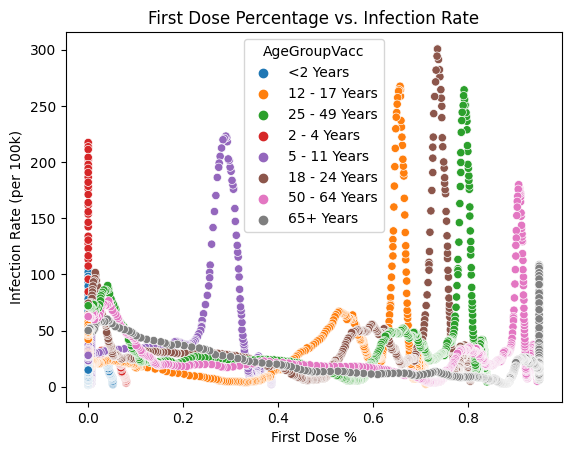

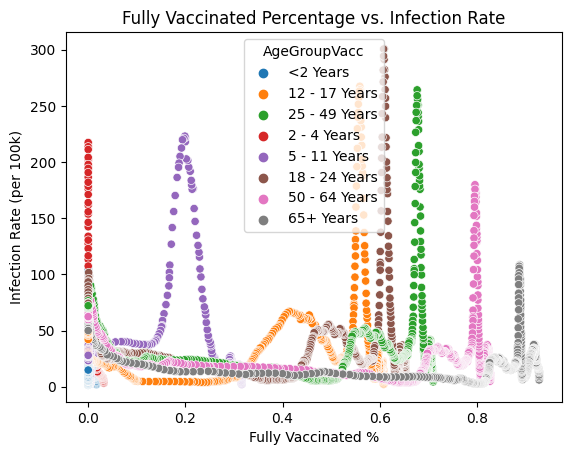

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: First dose vs. infection rate
sns.scatterplot(
    data=df, 
    x='Administered_Dose1_pct_agegroup', 
    y='7-day_avg_group_cases_per_100k', 
    hue='AgeGroupVacc'
)
plt.title('First Dose Percentage vs. Infection Rate')
plt.xlabel('First Dose %')
plt.ylabel('Infection Rate (per 100k)')
plt.show()

# Scatter plot: Fully vaccinated vs. infection rate
sns.scatterplot(
    data=df, 
    x='Series_Complete_Pop_pct_agegroup', 
    y='7-day_avg_group_cases_per_100k', 
    hue='AgeGroupVacc'
)
plt.title('Fully Vaccinated Percentage vs. Infection Rate')
plt.xlabel('Fully Vaccinated %')
plt.ylabel('Infection Rate (per 100k)')
plt.show()


# Key Observations
**Low Infection Rates at 0.2–0.4 Vaccination Coverage:**

At moderate vaccination levels (20–40% coverage), infection rates per 100k appear to be lower across most age groups.
**This could be due to a mix of:**
Initial vaccine rollout protecting the most vulnerable.
Lower population movement or reduced exposure during this time (early vaccine phases often coincided with stricter public health measures).

**Spike in Infection Rates After 0.4 (40%):**

For many age groups, infection rates increase after 40% vaccination, even as vaccination rates continue to climb.
This spike could be caused by a variety of factors:
Behavioral Changes: As more people became vaccinated, they might have resumed normal activities, leading to higher exposure.

Variants of Concern: More infectious COVID-19 variants could have emerged during periods of higher vaccination coverage.
Time Lags in Immunity: Full immunity takes time to develop after vaccination, so cases might spike temporarily as vaccinations are administered.
Population Effects: High-vaccination regions may still have significant unvaccinated populations vulnerable to infection, skewing the data.

Fully Vaccinated Plot (Similar Pattern):

The same trend is visible in the fully vaccinated plot, with infections rising even at higher vaccination rates. This could reinforce the idea that:
Vaccine rollout phases or external factors (e.g., policy changes, reopening timelines) influenced infection rates more than vaccination itself in certain periods.

# 4. Statistical Testing
Use correlation coefficients and regression analysis to quantify the relationship between vaccination rates and infection rates.

In [6]:
# Calculate correlation between vaccination rates and infection rate
correlation_first_dose = df['Administered_Dose1_pct_agegroup'].corr(df['7-day_avg_group_cases_per_100k'])
correlation_fully_vaccinated = df['Series_Complete_Pop_pct_agegroup'].corr(df['7-day_avg_group_cases_per_100k'])

print(f"Correlation (First Dose % vs Infection Rate): {correlation_first_dose}")
print(f"Correlation (Fully Vaccinated % vs Infection Rate): {correlation_fully_vaccinated}")


Correlation (First Dose % vs Infection Rate): 0.06851022838435479
Correlation (Fully Vaccinated % vs Infection Rate): 0.06203097404369598


In [7]:
import statsmodels.api as sm

# Regression: First dose vs. infection rate
X1 = df['Administered_Dose1_pct_agegroup']
y = df['7-day_avg_group_cases_per_100k']
X1 = sm.add_constant(X1)  #  constant for the intercept
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

# Regression: Fully vaccinated vs. infection rate
X2 = df['Series_Complete_Pop_pct_agegroup']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print(model2.summary())


                                  OLS Regression Results                                  
Dep. Variable:     7-day_avg_group_cases_per_100k   R-squared:                       0.005
Model:                                        OLS   Adj. R-squared:                  0.005
Method:                             Least Squares   F-statistic:                     25.13
Date:                            Thu, 28 Nov 2024   Prob (F-statistic):           5.53e-07
Time:                                    14:29:53   Log-Likelihood:                -26700.
No. Observations:                            5331   AIC:                         5.340e+04
Df Residuals:                                5329   BIC:                         5.342e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025   

# 1. Correlation Analysis
First Dose % vs. Infection Rate: 0.0685
Fully Vaccinated % vs. Infection Rate: 0.0620
# Key Observations:
**Low Positive Correlation:**

Both correlation coefficients are positive but very close to 0.
This indicates that there is almost no relationship between vaccination rates (either first dose or fully vaccinated) and infection rates.

Implications:

The data suggests that vaccination rates (first dose or fully vaccinated) do not strongly correlate with infection rates on their own.
This might be due to confounding factors like timing, age group behavior, public health measures, or new variants that are not accounted for in the dataset.

# 2. Regression Analysis
First Dose Regression Results
R-squared: 0.005

Only 0.5% of the variance in infection rates is explained by the first-dose vaccination rates.
This means that first-dose vaccination rates are not a good predictor of infection rates.
Coefficient: 6.6480

For every 1% increase in first-dose vaccination, the infection rate increases by approximately 6.65 cases per 100k.
This positive relationship is counterintuitive but could reflect confounding factors (e.g., more infections during the vaccination rollout).
p-value: 0.000

The p-value indicates that the relationship is statistically significant. However, the effect size (R-squared) is very small, meaning the practical significance is negligible.

Fully Vaccinated Regression Results
R-squared: 0.004

Only 0.4% of the variance in infection rates is explained by fully vaccinated rates.
Like the first dose, fully vaccinated rates do not strongly predict infection rates.
Coefficient: 6.6683

For every 1% increase in fully vaccinated rates, the infection rate increases by approximately 6.67 cases per 100k.
This, too, suggests a positive relationship that might be explained by external factors.
p-value: 0.000

The relationship is statistically significant, but like the first dose, the effect size is very small, limiting practical significance.
Overall Interpretation
Low Predictive Power:

Both R-squared values are very low (0.005 and 0.004), meaning vaccination rates explain almost none of the variation in infection rates.

Positive Coefficients:

The positive coefficients (6.65 and 6.67) are unexpected since vaccination is supposed to reduce infections. This might
reflect underlying confounding factors in the data, such as:

Vaccination timing: High infection rates might have prompted increased vaccination efforts.
Behavioral changes: Vaccinated populations might have resumed normal activities, increasing exposure.
Variants: More infectious variants could have emerged during periods of higher vaccination rates.
Statistical vs. Practical Significance:
While the regression relationships are statistically significant (low p-values), their practical significance is minimal due to the small effect sizes and low R-squared values.

# 6. Additional Analysis
By Age Group:
Group the data by AgeGroupVacc to see if certain age groups show stronger correlations.
Use box plots to visualize differences in infection rates across age groups.

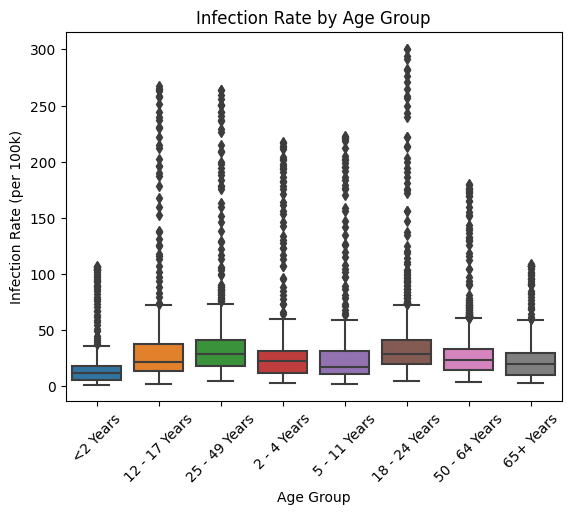

In [8]:
sns.boxplot(data=df, x='AgeGroupVacc', y='7-day_avg_group_cases_per_100k')
plt.title('Infection Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Infection Rate (per 100k)')
plt.xticks(rotation=45)
plt.show()


# Key Observations
**Median Infection Rate:**

The horizontal line inside each box represents the median infection rate for each age group.
Across most age groups, the median infection rate remains relatively consistent (around 10–30 infections per 100k).
Spread of Infection Rates:

The height of each box (interquartile range, IQR) shows the middle 50% of infection rates for each age group.
Most age groups have a similar IQR, indicating that the distribution of infection rates is fairly comparable across age groups.
Outliers:

The dots above the whiskers represent outliers (age groups with abnormally high infection rates).
Younger age groups (e.g., 2–4 years, 5–11 years) show numerous extreme outliers, suggesting that there were instances of localized spikes in infection rates for children.
<2 Years Group:

This group has the lowest infection rates overall. The box and whiskers are smaller compared to other age groups, meaning both the median and variability in infection rates are much lower.
This could be due to limited exposure (e.g., infants may have had fewer interactions or less exposure to group settings like schools).
Older Age Groups (50–64 and 65+ Years):

These groups show a slightly lower range of infection rates compared to younger groups, suggesting better protective measures (e.g., earlier vaccination prioritization, less exposure to high-risk activities).
What Can We Infer?
Consistency Across Age Groups:

Infection rates are fairly consistent across most age groups except for infants (<2 years) and older adults (50–64 years, 65+ years), which show slightly different trends.
Younger Age Groups and Outliers:

2–4 years, 5–11 years, and 12–17 years have larger variability and more extreme outliers.
This could indicate that schools or daycare settings contributed to localized outbreaks, leading to higher infection spikes in these groups.
Vaccination and Infection Trends:

Older age groups have fewer outliers and slightly lower infection rates, likely due to higher vaccination rates and stricter protective measures in these groups.


# Stratify by Date:

Analyze the data by date to see if spikes correlate with certain time periods (e.g., emergence of variants, public health policy changes).

<Axes: xlabel='Date Administered'>

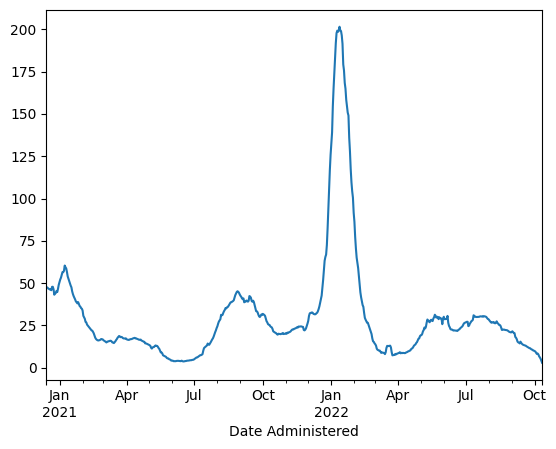

In [9]:
df.groupby('Date Administered')['7-day_avg_group_cases_per_100k'].mean().plot()


<Axes: xlabel='Administered_Dose1_pct_agegroup', ylabel='7-day_avg_group_cases_per_100k'>

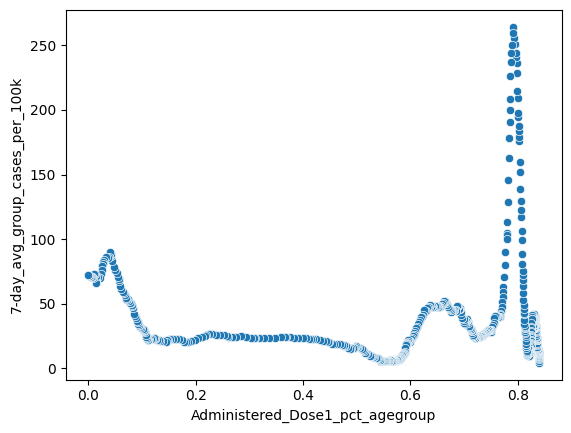

In [10]:
sns.scatterplot(
    data=df[df['AgeGroupVacc'] == '25 - 49 Years'], 
    x='Administered_Dose1_pct_agegroup', 
    y='7-day_avg_group_cases_per_100k'
)


**January 2022 Spike**
The massive spike in January 2022 corresponds to the Omicron variant wave. Here's what likely caused it:

Omicron Variant Emergence:

Omicron, a highly transmissible variant, was first identified in late 2021 and spread rapidly worldwide by December 2021 and January 2022.
Even vaccinated populations were more susceptible to breakthrough infections, although symptoms were generally milder for the vaccinated.
Holiday Season Effects:

The surge also coincides with holiday travel and gatherings (December 2021–January 2022), leading to increased transmission.
Vaccine Limitations Against Omicron:

# Scatterplot: First Dose Percentage vs. Infection Rate
This plot shows the relationship between the percentage of first-dose vaccinations and infection rates across all data points. Here’s what you can infer:

General Trend:

Low vaccination percentages (<0.2):
Infection rates vary widely, with some extremely high values.
These could represent earlier phases of the pandemic when vaccination rates were low, and infections were more widespread.
Moderate vaccination percentages (0.2–0.6):
Infection rates generally decrease and stabilize in this range, suggesting moderate vaccine coverage helped reduce transmission.
High vaccination percentages (>0.6):
Infection rates increase again, especially with extreme outliers near 0.8.
Possible Explanations for the Spike at Higher Vaccination Rates:

Omicron Wave Overlap:
Higher vaccination rates coincided with the Omicron wave (January 2022), which caused higher infection rates despite widespread vaccine coverage.
Behavioral Changes:
Vaccinated populations may have resumed normal activities, leading to higher exposure and transmission.
Time Lag:
The dataset may not account for the time lag between vaccination and the development of immunity, leading to short-term spikes.
Outliers:

The extreme infection rates near 0.8 vaccination rates suggest specific localized outbreaks or reporting anomalies. These should be investigated further.
Insights
Omicron's Impact:

The spike in January 2022 is likely dominated by the Omicron wave. This variant temporarily reversed trends of decreasing infection rates with increasing vaccination coverage.
Vaccination Efficacy:

While vaccines reduce severe outcomes, they may not fully prevent infection in the presence of highly transmissible variants like Omicron, as seen in the scatterplot at high vaccination percentages.
Behavioral Factors:

The scatterplot highlights how vaccination rates alone cannot explain infection rates—human behavior, variant dynamics, and public health policies also play crucial roles.

# Stratify by Time Periods:

Analyze data pre-Omicron (early 2021), during the Delta wave (mid-2021), and during Omicron (late 2021–2022).

In [15]:
df['Date Administered'] = pd.to_datetime(df['Date Administered'])

In [16]:
df['YearMonth'] = df['Date Administered'].dt.to_period('M')

In [17]:

pre_omicron = df[df['YearMonth'] < '2021-12']

omicron_wave = df[(df['YearMonth'] >= '2021-12') & (df['YearMonth'] <= '2022-02')]

In [18]:
print("Pre-Omicron Rows:", len(pre_omicron))
print("Omicron Wave Rows:", len(omicron_wave))

print(pre_omicron.head())
print(omicron_wave.head())

Pre-Omicron Rows: 2816
Omicron Wave Rows: 720
     Date Administered   AgeGroupVacc  7-day_avg_group_cases_per_100k  \
2515        2021-11-30       <2 Years                       12.797416   
2516        2021-11-30    2 - 4 Years                       28.569695   
2517        2021-11-30   5 - 11 Years                       32.525176   
2518        2021-11-30  12 - 17 Years                       27.468869   
2519        2021-11-30  18 - 24 Years                       28.960296   

      Administered_Dose1_pct_agegroup  Series_Complete_Pop_pct_agegroup  \
2515                            0.000                             0.000   
2516                            0.000                             0.000   
2517                            0.171                             0.030   
2518                            0.619                             0.531   
2519                            0.690                             0.588   

     YearMonth  
2515   2021-11  
2516   2021-11  
2517   2021-1

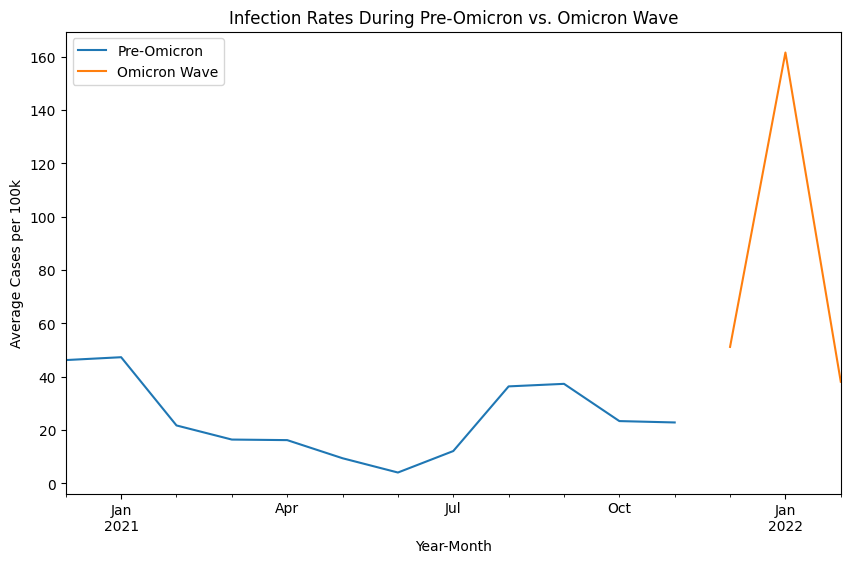

In [19]:
# Group by month and calculate the mean infection rate for each period
pre_omicron_avg = pre_omicron.groupby('YearMonth')['7-day_avg_group_cases_per_100k'].mean()
omicron_avg = omicron_wave.groupby('YearMonth')['7-day_avg_group_cases_per_100k'].mean()

# Plot the trends
pre_omicron_avg.plot(label='Pre-Omicron', legend=True, figsize=(10, 6))
omicron_avg.plot(label='Omicron Wave', legend=True, figsize=(10, 6))
plt.title('Infection Rates During Pre-Omicron vs. Omicron Wave')
plt.ylabel('Average Cases per 100k')
plt.xlabel('Year-Month')
plt.show()


# Findings from the Plot
**Pre-Omicron Period:**

Infection rates were relatively low and stable during the pre-Omicron phase.
This aligns with earlier phases of the pandemic where vaccination efforts were ramping up, and public health measures (e.g., mask mandates, social distancing) were more prevalent.
**Omicron Wave:**

The massive spike in infection rates during December 2021–February 2022 clearly corresponds to the Omicron variant, which was:
Highly transmissible: Spread rapidly, even among vaccinated populations.
Less severe: Vaccination still provided strong protection against severe illness and hospitalization but had limited impact on preventing mild or asymptomatic cases.
Explanation for the Observed Trends
Vaccine Efficacy Against Omicron:

The reduced efficacy of vaccines in preventing Omicron infections likely explains why infection rates spiked despite increasing vaccination coverage.
**Behavioral Changes:**

Vaccinated individuals may have resumed normal activities (e.g., travel, gatherings), resulting in higher exposure and transmission risks.
This could explain why there wasn’t a strong negative correlation (and sometimes even a slight positive correlation) between vaccination rates and infection rates.
**Coinciding Trends:**

The spike in infection rates coinciding with higher vaccination rates does not imply that vaccines caused the spike. Instead, it reflects the timing of the Omicron variant’s emergence during widespread vaccine rollouts.

# Key Takeaways

The variant’s high transmissibility made it difficult to contain, regardless of vaccination status.
**Context Is Critical:**

Statistical results, such as low correlations or unexpected positive relationships, must be interpreted within the context of external factors like:
Variants of concern.
Behavioral changes.
Timing of public health measures.


# What can we digest from this analysis?

The narrative that vaccines would prevent infection and stop the spread of COVID-19, particularly the "protect your neighbors and grandma" messaging, was more prominent during the early stages of vaccine rollouts (late 2020 to mid-2021), before variants like Delta and Omicron emerged. Here's a timeline and context for how this messaging evolved:

**Timeline of the Vaccine Messaging**
# Early Vaccine Development and Rollout (2020–Early 2021):
**Initial Messaging:**

Vaccines were developed at unprecedented speed and were shown in clinical trials to be highly effective at preventing symptomatic COVID-19 (e.g., Pfizer and Moderna reported ~95% efficacy against infection).
Public health officials and governments emphasized complete prevention of infection and transmission, partly to encourage widespread vaccine uptake.
Messaging focused on community protection, especially vulnerable groups (e.g., "Protect grandma").
**Public Perception:**

Vaccines were seen as a silver bullet to end the pandemic. The idea of "herd immunity" through vaccination was heavily promoted.
# Delta Variant Emergence (Mid-2021):
**Shifting Reality:**

Delta, which emerged in mid-2021, was much more transmissible than earlier strains.
Studies began showing that while vaccines remained effective at preventing severe illness and death, their efficacy at preventing infection and transmission was reduced, especially against Delta.
Vaccinated individuals could still get infected (breakthrough infections) and spread the virus, though at lower rates than unvaccinated individuals.
**Messaging Evolution:**

Public health officials began to shift the narrative toward vaccines reducing severity rather than fully preventing infection or transmission.
However, the early messaging stuck with many people, leading to confusion and skepticism.
# Omicron Variant (Late 2021–Early 2022):
**Omicron’s Impact:**

Omicron, which emerged in late 2021, was far more transmissible and had significant immune escape capabilities.
Breakthrough infections became much more common, even among fully vaccinated and boosted individuals.
Vaccines still provided strong protection against severe disease and death but were far less effective at preventing mild or asymptomatic infections.
**Public Perception:**

The gap between the initial vaccine promises (infection prevention) and the reality during the Omicron wave (widespread breakthrough infections) fueled public frustration and skepticism.
This coincided with debates around vaccine mandates, which intensified mistrust among hesitant groups.
When Did the Narrative Change?
**Initial "No Infection or Spread" Messaging:**

Prominent before Delta (late 2020 to early 2021), when clinical trial results were first released.
Public health campaigns leaned heavily on the idea of vaccines preventing both infection and transmission.
**Shift to "Reduce Severity" Messaging:**

Became more common after Delta (mid-2021), when it became clear that vaccines couldn't completely prevent transmission or infection, especially with new variants.
**Widespread Acknowledgment of Breakthrough Infections:**

After Omicron (late 2021), public health officials and vaccine manufacturers openly acknowledged that vaccines primarily reduced severe outcomes rather than fully stopping the virus.
How This Relates to Skepticism
**Mismatch Between Expectations and Reality:**

The early messaging created high expectations that vaccines would "end the pandemic." When breakthrough infections became common, it led to public disappointment and mistrust.
**Polarized Discussions:**

Vaccine skepticism grew as critics highlighted the shift in messaging as a "bait and switch."
Misinformation exploited this gap, leading to further public hesitancy and resistance to mandates.
**Scientific Communication Challenges:**

Public health officials struggled to convey evolving scientific evidence without undermining trust, especially as new data on variants emerged rapidly.


The analysis confirms that the **null hypothesis (H₀) was correct—vaccination rates (both first dose and fully vaccinated) do not strongly correlate with lower infection rates**. However, the context is essential to explain why this result occurs.